In [1]:
#al project da ya shabab hadfo anna bna5od data kbira 3n 3omala gom y2dmo 3la kard mn albank w fih nas at2blt w nas la 
#fa almfrod anna hanst5m algorithms t5lina ntwk3 lw 7d d5l albayant bta3to hynf3 ya5od kard wla la 
#kol al7agat ali lb # di m3mola lina 3shan nfhm alcode 3shan lma n5osh kol wa7d hyts2l lw7do 


#di ya shabab almktbat aw altools ali han7tag nstd3y mnha functions fl project 7aga kda zy allibraries 
#ali f c++ w kol wa7da fhm ms2ola 3n 7aaga 

#Importing the nessacry libraries for manipulating 
import numpy as np      #asasya w ms2ola 3n alanalyzing w alnumbering
import pandas as pd     #bthandle aldata w alnull values w alklam da 
import matplotlib.pyplot as plt  #btcreate HQ charts w statistics w kda 
import seaborn as sns    #shabh ali 2blha b higher level 
import sklearn          # di b2a bta3t almachine learning asln w hya alms2ola 3n tdrib aldata 

In [2]:

#importing functions from sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
#di functions hanst5dmha fl training ali hy7sl lldata


In [3]:
#loading the dataset
df = pd.read_csv('loan_data_set.csv')
#hna a7na 3mlna include lldataset ali hanst5dma w 7tnaha f variable df

#tb tandif mn eh asln w leh  
#bnndf aldata mn alnull values w alduplicate values 


In [4]:
#showing the first 5 rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#showing the dimenstions of dataset
df.shape


(614, 13)

In [6]:
#showing some analysis of dataset
df.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()
#hna shelna kol alnulls w alduplicates ali fl data


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#removing null & duplicate rows
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
#hna aho bn2kd an f3ln kolo atms7 


In [9]:
#check after cleaning 
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#allabel encoding da by7wl kol alcoloums l integers 3shan y3rf y3ml 3lahom analysis 

#label encoding
label_encoder=LabelEncoder()
df["Loan_ID"]=label_encoder.fit_transform(df["Loan_ID"])
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Married"]=label_encoder.fit_transform(df["Married"])
df["Dependents"]=label_encoder.fit_transform(df["Dependents"])
df["Education"]=label_encoder.fit_transform(df["Education"])
df["Self_Employed"]=label_encoder.fit_transform(df["Self_Employed"])
df["Property_Area"]=label_encoder.fit_transform(df["Property_Area"])
df["Loan_Status"]=label_encoder.fit_transform(df["Loan_Status"])



In [11]:
#hna b2a a7na 3mlna 2 variables x & y 
#x fiha kol al coloums m3ada al independent coloums aw bm3na as7 fiha alcoloums m3ada ali lw 7tnaha f 7sabtna msh hatfr2 f an
#hal ali m2dm 3l kard hya5do wla la #(akid alloan id msh hyfr2 f 7aga XD)#
#w axis = 1 y3ny 5li kol alvalues b 1 3shan mtfr2sh m3ana f 7aga #(drop coloums)#
#y fiha alcoloum ali 3yzen nkrro asln , hal ali m2dm hya5od al kard wla la 

#drop columns and 1 means drop column
x= df.drop(columns=['Loan_ID','Loan_Status'],axis=1) #independent coloums 
y = df["Loan_Status"] #target coloum 


In [12]:
#Hna a7na 2smna aldata 4 agza2 #(training lldata w trainig llresult w testing lldata w testing llresult )#
#train_test_split di bta3t 2smt aldata nfsha 
#test size hya kymt aldata 20% mn aldata w shuffle is true y3ny nt2kd an aldata htkon 3shawa2ya 3shan myb2ash fih bias

#here we make training and testing sets for the set and the target
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
#hna bnt2kd an aldata at2smt 


In [13]:
# Data shape before and after splitting
print(x.shape, x_train.shape, x_test.shape)
#abl ma abd2 a3ml classification bn3ml 7aga asmha feature scaling y3ny bn5li almachine trkz 3la al7agat
#ali momkn tfidna aktr f anna ntl3 accuracy a3la 


(480, 11) (384, 11) (96, 11)


In [14]:
#feature scaling 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#b3d ma 3mlna scaling dlo2ty n2dr n3ml normalization 3shan aldata tb2a f a7sn 7ala ll clasification


In [15]:
#normalization process 
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#b3d ma 3mlna normalization n3ml correlation 
#da by5lina n highlight alcoloums ali ht2sr awy fl target bta3na ali hwa hya5od alkard wla la


In [16]:

# Computing the correlation matrix
corr = df.corr()
#hna bnshow shakl alcorrelation


<Axes: >

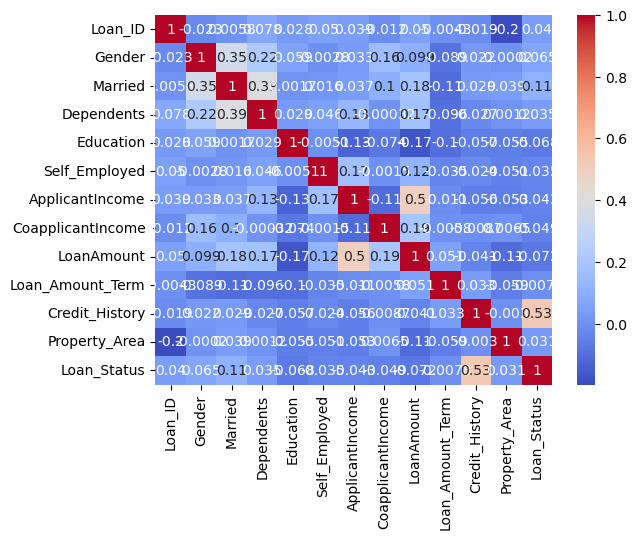

In [17]:
# Creating a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
#hna ast5dma bonus feature extraction method w ali btdwr 3la 3lakt kol feature b altarget bt3na 


In [18]:
# Calculating the mutual information between each feature and the target variable
mi_scores = mutual_info_classif(x , y)


In [19]:
# w hna bn show it 3ady
# Print the scores
print(mi_scores)
#hna a7na bd2na training b2a using al logistic reg , svm , D.tree 


[0.         0.00273859 0.         0.         0.         0.
 0.         0.         0.041141   0.13844772 0.        ]


In [20]:
# Train Logistic Regression model

lr = LogisticRegression()
lr.fit(x_train, y_train)


c:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Train SVM model
svm = SVC()
svm.fit(x_train, y_train)


SVC()

In [22]:
# Train Decision Tree (ID3) model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [23]:
#b3d ma 5lsna training 3ayzen b2a n evaluate almodel 
#y3ny 3yzen n3rf kol training method tl3t accuracy ad eh w 3mlt eh fl data ali adnahlha 
#bs alawl hn3ml prediction ll testing set aw y3ny han5tbrha 3shan nshof alntayg 

# Make predictions on the testing set for each model
lr_pred = lr.predict(x_test)
svm_pred = svm.predict(x_test)
dt_pred = dt.predict(x_test)
#mtlob mnna n evaluate b 4 ashkal fa a7na hn3mlhom wa7da wa7da 3la kol almodels 


In [24]:
# Evaluate the accuracy of each model       
# accuracy almodel hytl3 ntayg s7 ad eh
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
dt_acc = accuracy_score(y_test, dt_pred)


In [25]:
# Generate confusion matrix for each model   # gdwl fih alnsba ben alpredicted w alactual output
lr_cm = confusion_matrix(y_test, lr_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
dt_cm = confusion_matrix(y_test, dt_pred)


In [26]:
# Generate classification report for each model    
# summary l shoit metrices kda

#this code for setting every notpredicted sample to 0 
lr_cr = classification_report(y_test, lr_pred, zero_division=0)
svm_cr = classification_report(y_test, svm_pred, zero_division=0)
dt_cr = classification_report(y_test, dt_pred, zero_division=0)


In [27]:
# Generate mean square error for each model     # bt7sb alaverage diff. ben al actual & predicted output
lr_mse = mean_squared_error(y_test, lr_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
#b3d ma 3mlna generating l kol ashkal alevaluating 3yzen n show it b2a bs kol model lw7do 


In [28]:
# Print out the evaluation metrics for the logistic regression 
print("Logistic Regression: ")
print("Accuracy:", lr_acc)
print("Confusion Matrix: \n", lr_cm)
print("Classification Report: \n", lr_cr)
print("Mean Squared Error: ", lr_mse)


Logistic Regression: 
Accuracy: 0.78125
Confusion Matrix: 
 [[12 19]
 [ 2 63]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.39      0.53        31
           1       0.77      0.97      0.86        65

    accuracy                           0.78        96
   macro avg       0.81      0.68      0.70        96
weighted avg       0.80      0.78      0.75        96

Mean Squared Error:  0.21875


In [29]:
# Print out the evaluation metrics for SVM
print("\nSVM: ")
print("Accuracy:", svm_acc)
print("Confusion Matrix: \n", svm_cm)
print("Classification Report: \n", svm_cr)
print("Mean Squared Error: ", svm_mse)



SVM: 
Accuracy: 0.6770833333333334
Confusion Matrix: 
 [[ 0 31]
 [ 0 65]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.68      1.00      0.81        65

    accuracy                           0.68        96
   macro avg       0.34      0.50      0.40        96
weighted avg       0.46      0.68      0.55        96

Mean Squared Error:  0.3229166666666667


In [30]:
# Print out the evaluation metrics for D.tree
print("\nDecision Tree: ")
print("Accuracy:", dt_acc)
print("Confusion Matrix: \n", dt_cm)
print("Classification Report: \n", dt_cr)
print("Mean Squared Error: ", dt_mse)



Decision Tree: 
Accuracy: 0.6666666666666666
Confusion Matrix: 
 [[15 16]
 [16 49]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.48      0.48        31
           1       0.75      0.75      0.75        65

    accuracy                           0.67        96
   macro avg       0.62      0.62      0.62        96
weighted avg       0.67      0.67      0.67        96

Mean Squared Error:  0.3333333333333333


In [31]:
#b3d b2a ma 5lsna kol 7aaga 3ayzen n3rd aldataset b3d kol alklam da 

#dataset description
print(df)



     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1           1          0              0   
2          1       1        1           0          0              1   
3          2       1        1           0          1              0   
4          3       1        0           0          0              0   
5          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
609      475       0        0           0          0              0   
610      476       1        1           3          0              0   
611      477       1        1           1          0              0   
612      478       1        1           2          0              0   
613      479       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2